In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pims

from scipy.ndimage import gaussian_filter


In [47]:
datapath = '/mnt/d/Gel_Sheet_Data/sample/T37'
imseq =pims.ImageSequence(datapath+'/*.tif')

In [48]:
np.array(imseq[10]).shape

(512, 512)

In [49]:
im = imseq[0]
imsz = im.shape
im_stack = np.zeros(imsz +(len(imseq),))

for i in range(len(imseq)):
    im_stack[:,:,i] = imseq[i]
print(im_stack.shape)

(512, 512, 236)


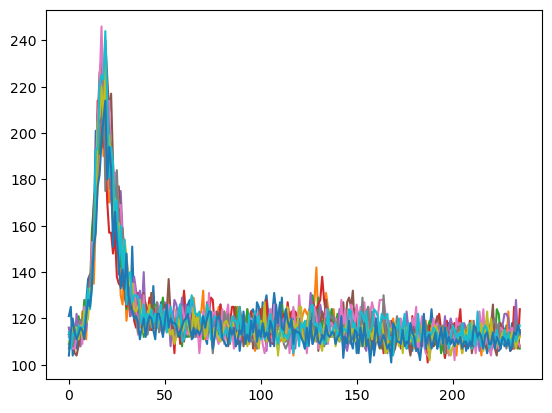

In [50]:
plt.figure()
for i  in range(0,512,50):
    plt.plot(im_stack[256,i,:])

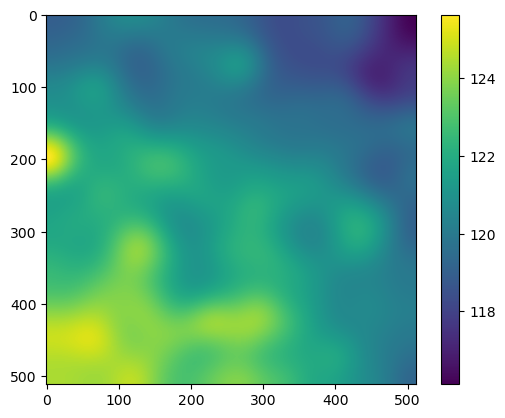

In [51]:
bg = gaussian_filter(np.mean(im_stack[:,:,:],axis = 2),25)
plt.imshow(bg); plt.colorbar()

In [52]:
imstack_bg = np.zeros(im_stack.shape)
for i in range(len(imseq)):
    imstack_bg[:,:,i] = gaussian_filter(im_stack[:,:,i],2)/bg

(0.8, 1.2)

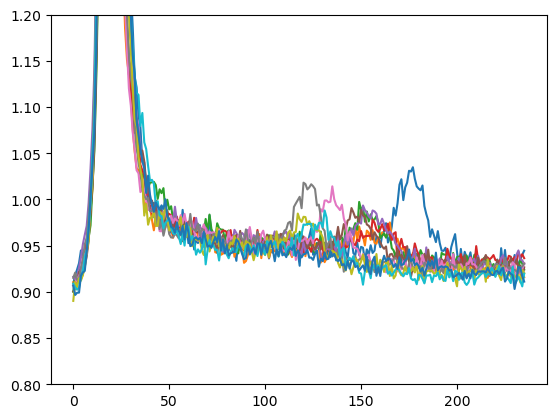

In [58]:
plt.figure()
for i  in range(0,512,50):
    plt.plot(imstack_bg[i,256,:])
plt.ylim([0.8,1.2])

In [54]:
h = np.zeros(im.shape)
for i in range(h.shape[0]):
    for j in range(h.shape[1]):
        h[i,j] = np.where(imstack_bg[i,j,:]>1.05)[0][-1] 

In [55]:
h

array([[37., 37., 37., ..., 32., 32., 31.],
       [37., 37., 37., ..., 33., 32., 32.],
       [34., 34., 34., ..., 33., 33., 33.],
       ...,
       [33., 33., 33., ..., 31., 31., 31.],
       [32., 32., 32., ..., 32., 31., 31.],
       [32., 32., 32., ..., 32., 31., 31.]])

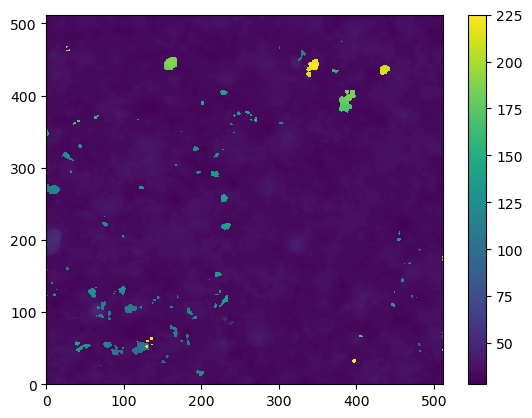

In [56]:
plt.pcolormesh(h);plt.colorbar()


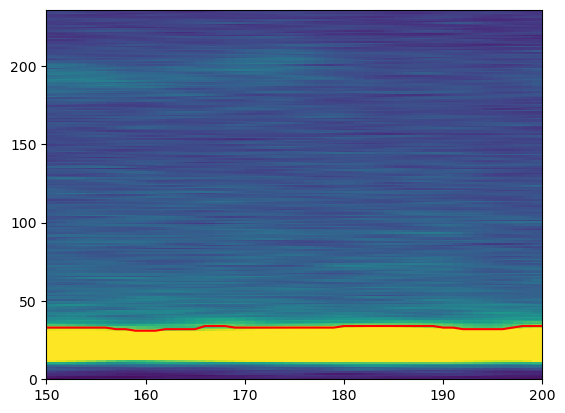

In [57]:
plt.pcolormesh(np.transpose(imstack_bg[:,400,:]));plt.plot(h[:,400],'r')
plt.xlim([150,200])
plt.clim([0.9,1.1])